In [1]:
import math
import numpy as np
import numpy.random as rd
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from statistics import mean
from statistics import variance
from scipy.stats import gaussian_kde
import statistics
import seaborn as sns
import time
import random

In [2]:
# this function generates given no of random numbers from [0,1]
# Xo is the seed
# full period if m is a power of 2, c is odd and a is 4*n + 1
def Uniform_Distribution(Xo, m, a, c,N):
    arr1 = []
    arr = []
    arr1.append(Xo%m)
    for i in range(1, N):
        arr1.append((arr1[i - 1] * a + c) % m)
    for i in range(0,N):
        arr.append(arr1[i]/m)
    return arr

In [3]:
def G_inverse(u, α, A):
    if 0 < u and u < 1/(α*A):
        return np.power(α*A*u,1/α)
    else:
        return -np.log(A)-np.log(1-u)

def g(x,α,A):
    if 0 < x and x < 1:
        return np.power(x,α-1)/A
    else: 
        return np.exp(-x)/A

def f(x, α):
    return (np.power(x,α-1)*np.exp(-x))/math.gamma(α)

In [4]:
def Fractional(N,α):
    out = np.zeros(N)
    if α == 0:
        return out
    num = 10*N
    U1 = Uniform_Distribution(31,2**60, 101, 3, num)
    
    A = ((1/α) + (1/np.exp(1)))
    c = A/math.gamma(α)
    
    X = []
    for i in range(num):
        X.append(G_inverse(U1[i], α, A))
    
    U2 = Uniform_Distribution(19, 2**55, 65, 23, num)
    j = 0
    for i in range(N):
        while True:
            x = X[j]
            u2 = U2[j]
            j = j + 1
            if c*g(x,α,A)*u2 <= f(x,α):
                out[i] = x
                break
    return out

In [5]:
# it gives N random numbers from F(x) = 1-expo(-x/θ) distribution
def Exponential_Distribution(N, θ, Xo, a, m, c):
    U = Uniform_Distribution(Xo, a, m, c,N)
    expo = []
    for i in range(0,N):
        num = -θ*math.log(U[i])
        expo.append(num)
    return expo

In [12]:
def Integer(N, α):
    j = 0
    num = int(10**5)
    j = 0
    out = np.zeros(N)
    for i in range(N):
        n = α
        y = 0
        t = random.randint(500, 50000)
        while n > 0:
            u = rd.uniform(0,1)
            x = -1*np.log(u)
            y = y + x
            n = n-1
        out[i] = y
    return out

In [13]:
def Gamma(N, α, β):
    out = np.zeros(N)
    Y = Fractional(N, math.modf(α)[0])
    Z = Integer(N, math.modf(α)[1])
    for i in range(N):
        out[i] = (Y[i] + Z[i])/β
    return out

In [18]:
out = Gamma(100000, 5.5,1)

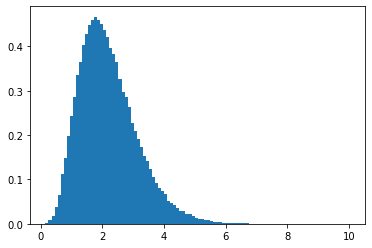

In [15]:
plt.hist(out, bins = 100, density = True)
plt.show()

In [16]:
np.mean(out)

2.1930083049717357

In [17]:
statistics.variance(out)

0.8780202674844595